# Mandatory Assignment 1
**Hand-in Date:** 19th of February, 2024

**Group Mmbers:**
- Laura Bøjer
- Lærke Stald Pedersen

## 1. EDA & Preprocessing

### 1.1. Question overview
- **Question 1:** What does the dataset contain and how is it structured?
- **Question 2:** Are there any missing or invalid values?
- **Question 3:** Are there any missing or invalid values?
- **Question 4:** Are there any duplicate values?
- **Question 5:** Are there any outliers?
- **Question 6:** How do the different attributes correlate with our target value 'popularity'?
- **Question 7:** Which songs, artists, and genres are the most popular?
- **Question 8:** Which artists occur the most in the dataset?
- **Question 9:** Which genres occur the most in the dataset?

In [240]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Classifier models
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### 1.2. **Question 1:** What does the dataset contain and how is it structured?

As an inital step in gaining an understanding of the dataset, we utilize different methods for retrieving information about the distribution and shape of the datset.
We used the .info()-function to retrieve information about the number of rows and columns as well as the present data types.
This generated the following insights:
- **Instances/rows:** 91,199 
- **Attributes/colummns:** 20 
- **Data types:** 1 boolean, 9 float, 6 integer, and 4 string attributes

We used the .describe()-function to retrieve descriptive statistics about each data type in the dataset prior to data cleaning. 
This gives us an initial indication of outliers based on data distribution in percientiles before doing any visualizations.
- **Numerical:** total count of entries, mean, standard deviation, percentiles (25%, 50%, 25%) and mminimum and maximum value for each column
- **Categorical:** total count of entries, number of unique entries, top occuring values and the frequency of these
- **Boolean:** total count of entries, number of unique entries, top occuring values and the frequency of these

In [241]:
# Setting options for displaying dataset
pd.set_option('display.max_columns', 200)

In [242]:
# Reading and declaring dataset variables from attached .csv-files
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

df_train.head()

,ID,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,96253,Seu Jorge,"Musicas para Churrasco, Vol.1 (Ao Vivo) (Delux...",Carolina (Ao Vivo),358733,False,0.641,0.880,11,-6.401,0,0.0604,0.1510,0.000761,0.611,0.423,93.000,4,samba,41
1,70417,Chyi Chin,"""1"" (壹)",大約在冬季,231520,False,0.668,0.361,5,-9.710,0,0.0353,0.7950,0.000000,0.246,0.432,73.919,3,mandopop,52
2,66688,Babyboomboom,English and French,"Heads, Shoulders, Knees and Toes (Tête, Epaule...",98386,False,0.786,0.225,9,-16.516,1,0.5730,0.6790,0.000000,0.201,0.658,110.066,4,kids,11
3,51391,Sidhu Moose Wala;DIVINE,Moosetape,Moosedrilla (feat. DIVINE),232173,False,0.709,0.829,0,-5.817,1,0.2450,0.0698,0.000000,0.561,0.654,137.954,4,hip-hop,61
4,95123,Rumbavana,Pa Que Lo Goces Con Ganas,El Capitolio,360320,False,0.786,0.702,0,-6.742,1,0.0456,0.5110,0.000000,0.120,0.696,104.030,4,salsa,37


In [243]:
# Printing information summary on training data including data types, row count and number of colums 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                91199 non-null  int64  
 1   artists           91199 non-null  object 
 2   album_name        91199 non-null  object 
 3   track_name        91199 non-null  object 
 4   duration_ms       91199 non-null  int64  
 5   explicit          91199 non-null  bool   
 6   danceability      91199 non-null  float64
 7   energy            91199 non-null  float64
 8   key               91199 non-null  int64  
 9   loudness          91199 non-null  float64
 10  mode              91199 non-null  int64  
 11  speechiness       91199 non-null  float64
 12  acousticness      91199 non-null  float64
 13  instrumentalness  91199 non-null  float64
 14  liveness          91199 non-null  float64
 15  valence           91199 non-null  float64
 16  tempo             91199 non-null  float6

In [244]:
# Printing descriptive statistics summary on dataset for both numerical (float and integer) data
df_train.describe(include=[np.number])

,ID,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,91199.000000,9.119900e+04,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,57139.926140,2.280353e+05,0.566913,0.640850,5.309554,-8.269501,0.637759,0.084752,0.315576,0.156965,0.213367,0.473805,122.120902,3.902707,33.298644
std,32958.081692,1.080505e+05,0.173321,0.251657,3.558856,5.042269,0.480651,0.105707,0.332568,0.310527,0.190603,0.258998,29.979550,0.434682,22.312524
min,0.000000,1.338600e+04,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28511.500000,1.741655e+05,0.456000,0.471000,2.000000,-10.024000,0.000000,0.035900,0.017100,0.000000,0.097900,0.260000,99.093500,4.000000,17.000000
50%,57235.000000,2.128880e+05,0.580000,0.684000,5.000000,-7.016000,1.000000,0.049000,0.170000,0.000041,0.132000,0.464000,122.012000,4.000000,35.000000
75%,85710.500000,2.614415e+05,0.695000,0.853000,8.000000,-5.001000,1.000000,0.084600,0.598000,0.050000,0.273000,0.683000,140.059500,4.000000,50.000000
max,113999.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000


In [245]:
# Printing descriptive statistics summary on dataset for categorical (string) data
df_train.describe(include=[object])

,artists,album_name,track_name,track_genre
count,91199,91199,91199,91199
unique,27849,40600,62098,114
top,The Beatles,Alternative Christmas 2022,Run Rudolph Run,pop
freq,224,149,124,834


In [246]:
# Printing descriptive statistics summary on dataset for both boolean data
df_train.describe(include=['boolean'])

,explicit
count,91199
unique,2
top,False
freq,83348


### 1.3. **Question 2:** Are there any missing or invalid values?

As shown below, there are no NaN-values.

In [247]:
# Printing possible NaN-values in training data
df_train.isna().sum()

ID                  0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
popularity          0
dtype: int64

### 1.4. **Question 3:** Are there any duplicate values?

Initially, we check for duplicates in the dataset based on all columns. This shows no duplicates.

On further investigation, we decide to exclude the 'ID'-column, which shows 381 duplicates. 

We see that the same song occur multiple times, hence we decide to drop the 'track_genre'-column, as we identify this attribute as being the only differentiator. 

This shows 16,023 duplicates, which we then decide to remove from the dataset.

In [248]:
# Locating possible duplicate values in dataset
df_train.loc[df_train.duplicated()]

,ID,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity


In [249]:
# Locating possible duplicate values in dataset excluding the 'ID'-column
df_dropped = df_train.drop(columns=['ID'])
df_dropped.loc[df_dropped.duplicated()]

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
2885,Cheap Trick,Alternative Christmas 2022,I Wish It Was Christmas Today,194120,False,0.383,0.984,8,-3.573,1,0.1030,0.000246,0.287000,0.2400,0.3040,164.959,4,power-pop,0
3580,Wolfgang Amadeus Mozart;New Philharmonia Orche...,Mozart: A Night of Classics,"Symphony No. 40 In G Minor, K.550: 1. Molto al...",85960,False,0.308,0.128,7,-16.179,0,0.0368,0.929000,0.956000,0.1240,0.2940,103.577,4,classical,9
7895,Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...,Hans Zimmer: Epic Scores,"The General Who Became A Slave - From ""Gladiat...",183293,False,0.259,0.222,6,-22.052,0,0.0313,0.017000,0.790000,0.1120,0.0909,99.882,3,german,20
7913,Feid,Perreo en Halloween,Si Te La Encuentras Por Ahí,191506,False,0.736,0.569,8,-3.559,0,0.0779,0.144000,0.000053,0.1120,0.4330,171.973,4,pop,4
9697,Spuntic,Hybrid Source,Outlined,348133,False,0.219,0.124,9,-21.633,1,0.0482,0.909000,0.927000,0.1880,0.0381,77.691,5,iranian,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90373,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",235547,False,0.167,0.332,1,-9.888,1,0.0359,0.992000,0.191000,0.1130,0.0527,62.970,4,romance,0
90394,Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...,Hans Zimmer: Epic Scores,"The Gladiator Waltz - From ""Gladiator"" Soundtrack",505200,False,0.339,0.429,8,-15.441,1,0.0472,0.159000,0.903000,0.1090,0.2380,171.495,3,german,12
90714,George Jones,Image Of Me,These Hands,169306,False,0.449,0.243,11,-11.611,1,0.0299,0.796000,0.000007,0.0983,0.2300,78.397,3,honky-tonk,10
90966,George Jones,Fine Country Wine,Heartaches And Hangovers,134666,False,0.483,0.533,9,-12.519,1,0.0424,0.403000,0.000000,0.2380,0.8520,156.817,4,honky-tonk,12


In [250]:
# Locating possible duplicate values in dataset excluding the 'ID'- and 'track-genre'-column
df_dropped = df_train.drop(columns=['ID', 'track_genre'])
df_dropped.loc[df_dropped.duplicated()]

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
254,Mastodon,Top of the Rock,Teardrinker,320507,False,0.457,0.979,5,-3.836,1,0.0485,0.000010,0.119000,0.1230,0.227,127.006,4,0
444,Arctic Monkeys,AM,R U Mine?,201726,False,0.288,0.758,6,-5.692,0,0.0371,0.006160,0.000000,0.3030,0.619,97.094,4,83
652,Weezer,Top of the Rock,Records,208920,False,0.658,0.773,11,-5.119,1,0.0244,0.000901,0.000000,0.1940,0.660,100.006,4,0
782,Daddy Yankee;Snow,pov: it's 2019,Con Calma,193226,False,0.737,0.860,8,-2.652,0,0.0594,0.110000,0.000002,0.0574,0.656,93.989,4,0
1278,Wisin & Yandel,Noche de Halloween Latino,Hipnotízame,243386,False,0.775,0.828,0,-3.972,1,0.1390,0.289000,0.000000,0.4340,0.571,79.992,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91182,Glenn Fredly,Happy Sunday,Kisah Yang Salah,253893,False,0.449,0.437,3,-6.425,1,0.0307,0.320000,0.000000,0.0988,0.147,121.911,4,39
91187,Nirvana,Nevermind (Remastered),In Bloom,255080,False,0.436,0.876,10,-4.902,0,0.0647,0.000033,0.000104,0.2050,0.512,157.044,4,67
91189,Barão Vermelho,iCollection - Barão Vermelho,Amor meu grande amor,275586,False,0.633,0.570,6,-5.668,1,0.0269,0.219000,0.000014,0.1180,0.469,101.889,4,44
91190,Marvin Gaye,Christmas Day Chill,I Want To Come Home For Christmas,205133,False,0.309,0.564,6,-6.955,0,0.0380,0.119000,0.001750,0.1110,0.488,179.106,3,0


In [251]:
# Printing present number of rows and columns
df_train.shape

(91199, 20)

In [252]:
# Dropping duplicate values
i = df_dropped.loc[df_dropped.duplicated()].index
df_train = df_train.drop(i)

In [253]:
# Printing present number of rows and columns
df_train.shape

(75176, 20)

### 1.5. **Question 4:** Are there any outliers?

Based our explorations so far, we identify possible outliers. To further examine this, we visualize the distribution of our numerical data types in histograms and box-plots.

This generates the following insights about possible outliers:
- Outliers in 'duration_ms'
- Outliers in 'loudness'
- Outliers in 'speechiness'
- Outliers in 'instrumentalness'
- Outliers in 'liveness'
- Outliers in 'tempo'

Based on our visualizations, we decide to try out removing different outliers. This process is iterative along with the modelling process, in order to check how removal affects model scores.

We decide to remove the upper 5 percentile of outliers for 'duration_ms', which in removal of 3,759 instances.

In [254]:
# Declaring a dataframe for visualizations only including numerical data types
df = df_train[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']]

array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'popularity'}>, <Axes: >, <Axes: >]],
      dtype=object)

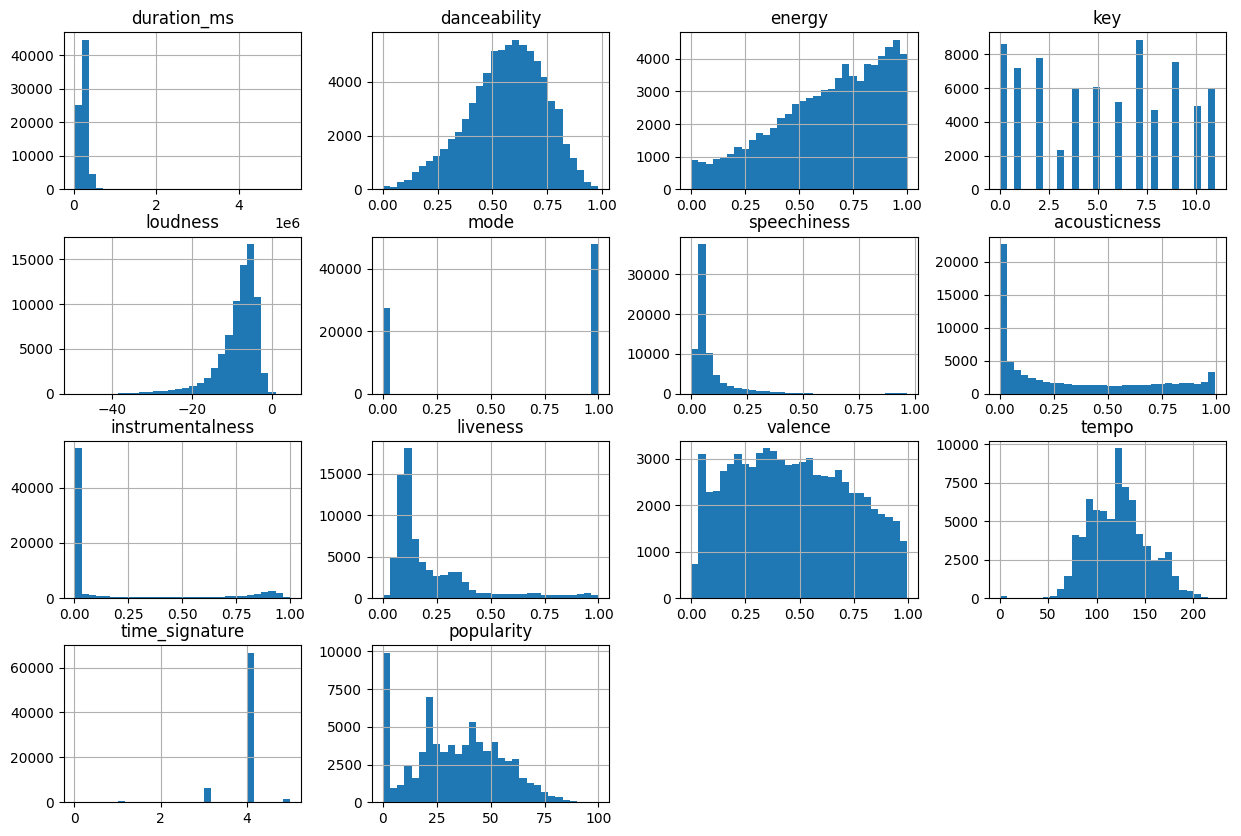

In [255]:
# Visualizing numerical data in histograms
df.hist(figsize=(15,10), bins=30)

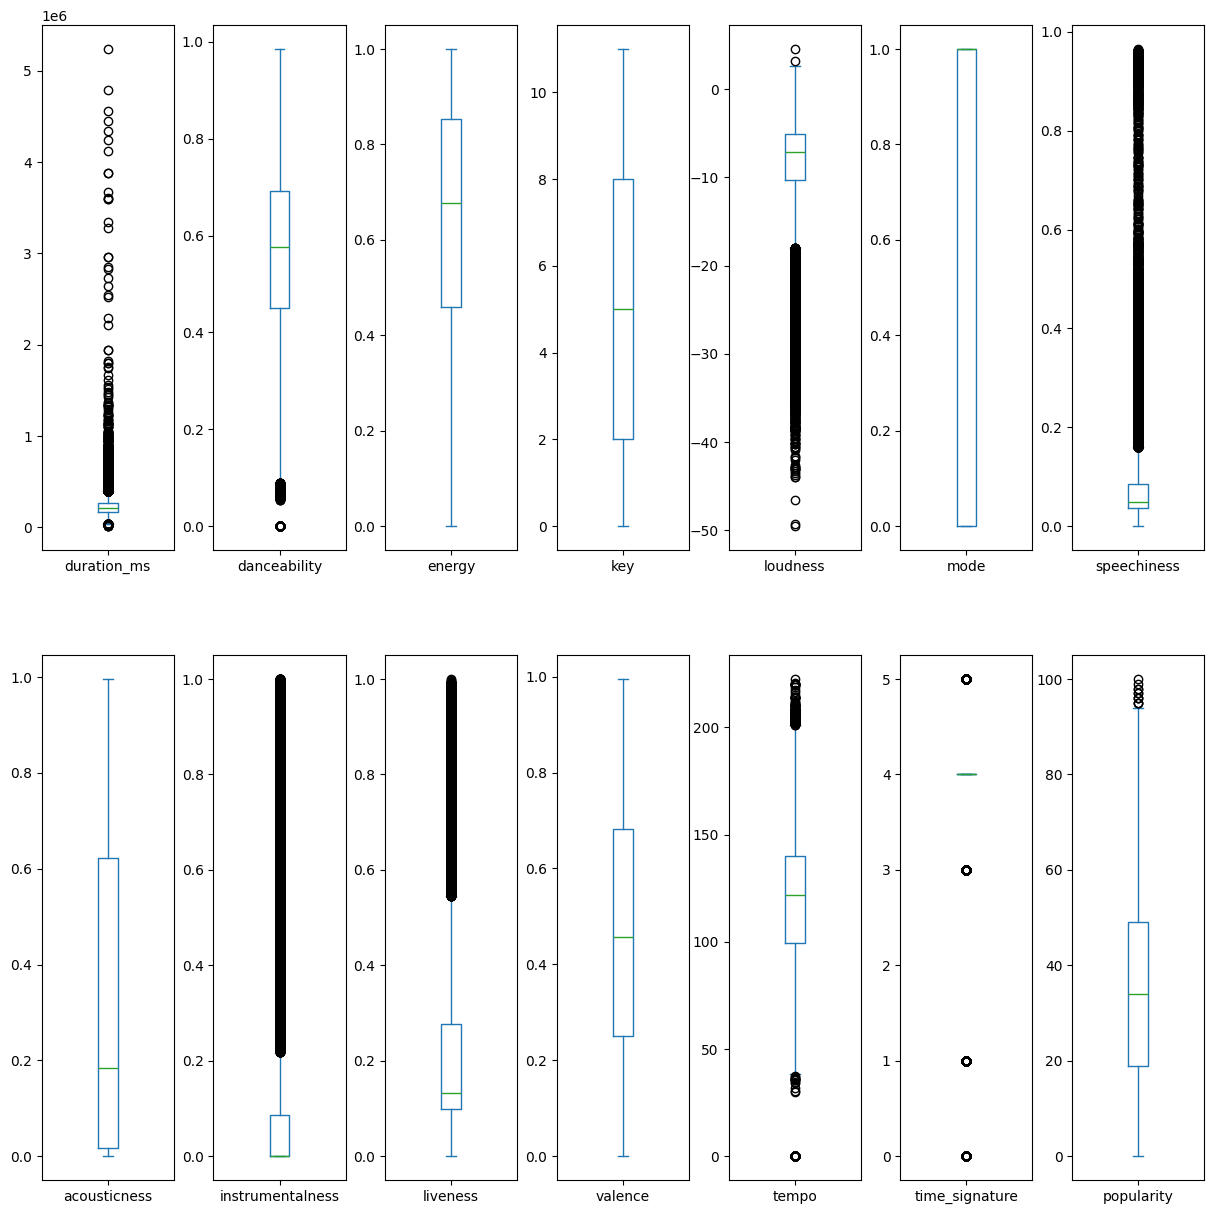

In [256]:
# Visualizing numerical data in box-plots
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15,15),
    layout=(2,7)
)

plt.subplots_adjust(wspace=0.3)

plt.show()

In [257]:
# Printing present number of rows and columns
df_train.shape

(75176, 20)

In [258]:
# Dropping outliers from 'duration_ms'
last_q = df_train['duration_ms'].quantile(q=.95)
df_train = df_train.drop(df_train[df_train['duration_ms'] > last_q].index)

In [259]:
# Sorting data from 'instrumentalness' into bins
df_train['instrumentalness'] = pd.cut(df_train['instrumentalness'], bins=100, labels=False)

df_train['instrumentalness'].describe()

count    71417.000000
mean        15.323662
std         30.803658
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         99.000000
Name: instrumentalness, dtype: float64

In [260]:
# Exploring dropping other outliers

#last_q = df_train['speechiness'].quantile(q=.80)
#df_train = df_train.drop(df_train[df_train['speechiness'] > last_q].index)

#last_q = df_train['liveness'].quantile(q=.90)
#df_train = df_train.drop(df_train[df_train['liveness'] > last_q].index)

#last_q = df_train['instrumentalness'].quantile(q=.90)
#df_train = df_train.drop(df_train[df_train['instrumentalness'] > last_q].index)

#last_q = df_train['loudness'].quantile(q=.10)
#df_train = df_train.drop(df_train[df_train['loudness'] < last_q].index)

In [261]:
# Displaying dataset after outlier removal
df_train

,ID,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,96253,Seu Jorge,"Musicas para Churrasco, Vol.1 (Ao Vivo) (Delux...",Carolina (Ao Vivo),358733,False,0.641,0.880,11,-6.401,0,0.0604,0.151000,0,0.6110,0.4230,93.000,4,samba,41
1,70417,Chyi Chin,"""1"" (壹)",大約在冬季,231520,False,0.668,0.361,5,-9.710,0,0.0353,0.795000,0,0.2460,0.4320,73.919,3,mandopop,52
2,66688,Babyboomboom,English and French,"Heads, Shoulders, Knees and Toes (Tête, Epaule...",98386,False,0.786,0.225,9,-16.516,1,0.5730,0.679000,0,0.2010,0.6580,110.066,4,kids,11
3,51391,Sidhu Moose Wala;DIVINE,Moosetape,Moosedrilla (feat. DIVINE),232173,False,0.709,0.829,0,-5.817,1,0.2450,0.069800,0,0.5610,0.6540,137.954,4,hip-hop,61
4,95123,Rumbavana,Pa Que Lo Goces Con Ganas,El Capitolio,360320,False,0.786,0.702,0,-6.742,1,0.0456,0.511000,0,0.1200,0.6960,104.030,4,salsa,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91191,82387,Screeching Weasel,The Awful Disclosures Of Screeching Weasel,Just Another Fool,148440,False,0.434,0.903,7,-5.975,1,0.0427,0.000039,5,0.0857,0.4390,97.003,4,power-pop,25
91194,76821,Phil Coulter,Country Serenity,You Raise Me Up,238546,False,0.502,0.190,10,-11.985,1,0.0363,0.920000,85,0.0838,0.1500,131.745,4,opera,20
91195,110269,Sajanka,Time of India,Lord Shiva,310067,False,0.559,0.924,7,-5.017,1,0.0674,0.010500,88,0.8640,0.1340,145.008,4,trance,28
91197,860,The Mayries,I Will Wait,I Will Wait,216841,False,0.421,0.107,6,-15.191,1,0.0335,0.948000,0,0.0881,0.1180,104.218,4,acoustic,44


In [262]:
# Re-declaring the dataframe for visualizations only including numerical data type after outliers
df = df_train[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']]

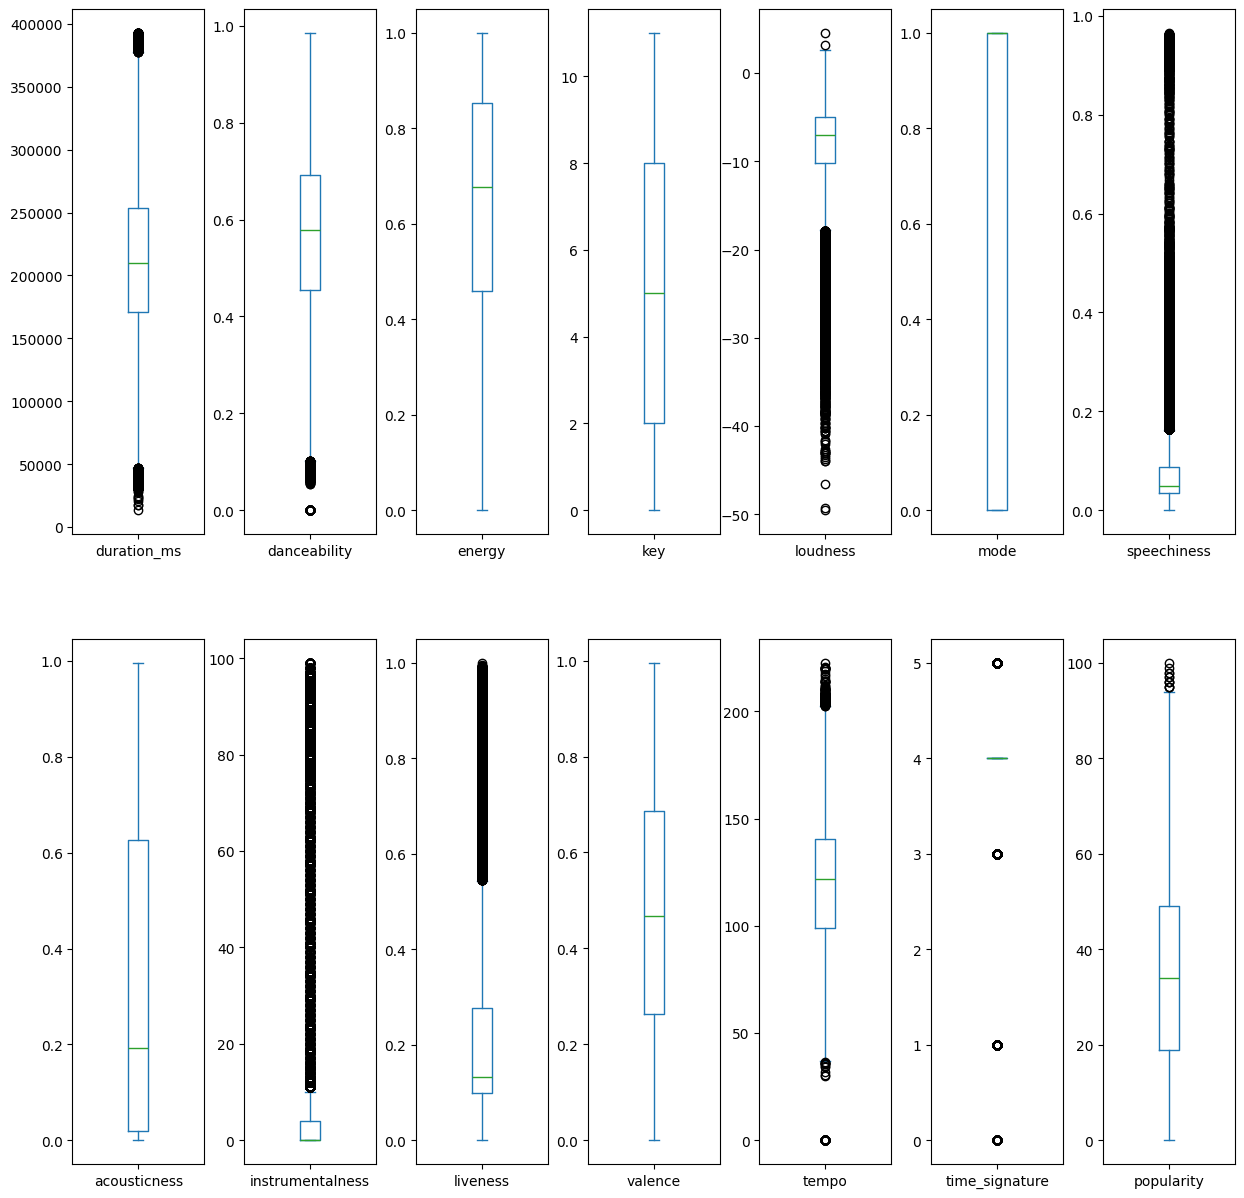

In [263]:
# Visualizing numerical data in box-plots after outlier removal
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15,15),
    layout=(2,7)
)

plt.subplots_adjust(wspace=0.3)

plt.show()

In [264]:
# Printing present number of rows and columns
df_train.shape

(71417, 20)

array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'popularity'}>, <Axes: >, <Axes: >]],
      dtype=object)

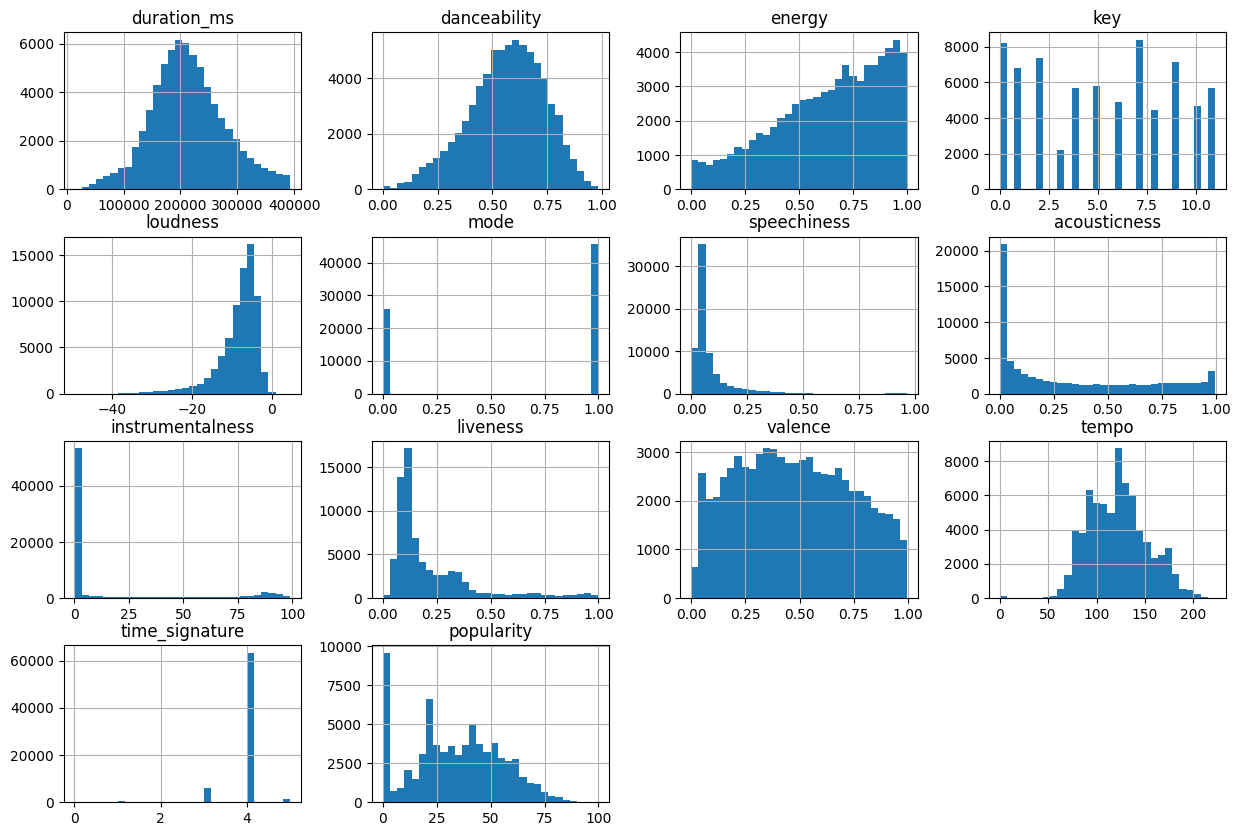

In [265]:
# Visualizing numerical data in histograms after outlier removal
df.hist(figsize=(15,10), bins=30)

### 1.6. **Question 5:** How do the different attributes correlate with our target value 'popularity'?

To investigate correlations in the dataset, we calculate the one-to-one correlations and visualize them in a correlation matrix (note that these numbers are calculated after outlier removal).

Generally, the we see a weak correlation between popularity and the numerical attributes with 'instrumentalness' having the strongest (negative) correlation with popularity of -0.104050.

While these correlations are weak, it does not factor out the possibility, that when combined, the attributes provide valuable predictive measures. Hence, we decide to not exclude any features at this point in time.

In [266]:
# Declaring integers and float data type columns as dataframe for plotting to avoid boolean and string value interference
df = df_train[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']]

In [267]:
# Calculating pairwise correlations between integer and float data type columns in training data 
corr_matrix = df.corr()

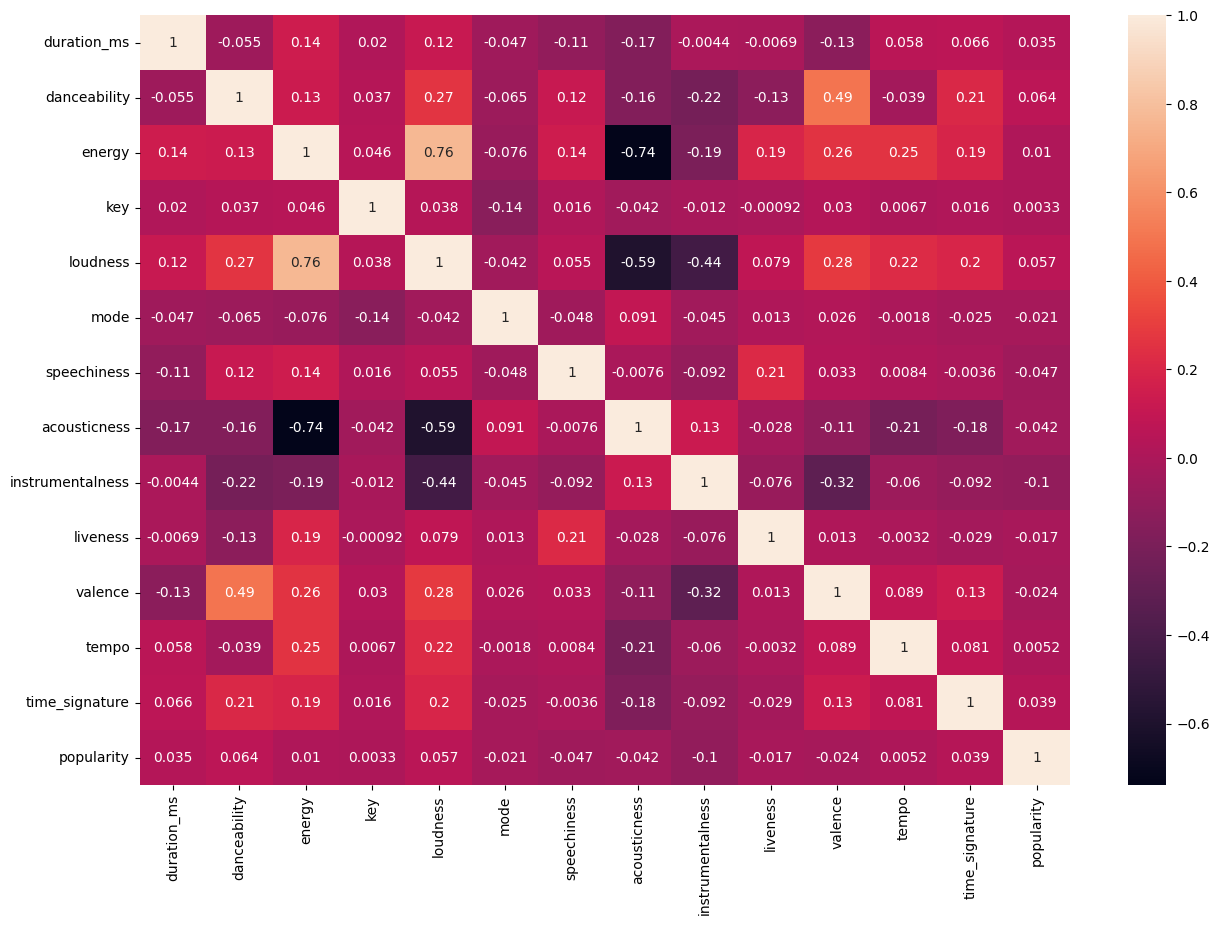

In [268]:
# Printing correlation matrix of above selcted columns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, ax=ax)

plt.show()

In [277]:
# Printing above correlations with the popularity-attribute and sorting them descending by absolute value
corr_matrix[['popularity']].sort_values(by='popularity', key=abs)

,popularity
key,0.003304
tempo,0.005208
energy,0.010292
liveness,-0.017119
mode,-0.020620
valence,-0.024123
duration_ms,0.034895
time_signature,0.039318
acousticness,-0.041754
speechiness,-0.047026


### 1.7. **Question 6:** Which songs, artists and genres are the most popular?

As shown below, the song 'Unholy' by Sam Smith featuring Kim Petras is regarded as the most popular song in the dataset.

In [270]:
# Sorting values ascending by popularity to 
df_train.sort_values(by='popularity', ascending=False).head(10)

,ID,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
62341,20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0,0.2660,0.238,131.121,4,dance,100
42891,51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,3,0.2300,0.550,128.033,4,hip-hop,99
4515,30003,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0,0.3710,0.304,128.040,4,edm,98
11274,68303,Manuel Turizo,La Bachata,La Bachata,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0,0.2180,0.850,124.980,4,latino,98
57474,89405,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,243716,False,0.650,0.715,5,-5.198,0,0.2530,0.09930,0,0.1260,0.187,106.672,4,reggaeton,97
27958,67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0,0.0933,0.425,92.005,4,latin,97
480,67559,Bad Bunny,Un Verano Sin Ti,Efecto,213061,False,0.801,0.475,7,-8.797,0,0.0516,0.14100,0,0.0639,0.234,98.047,4,latin,96
23378,91003,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.08260,0,0.0546,0.825,139.994,4,rock,96
8666,20000,Chris Brown,Indigo (Extended),Under The Influence,184613,True,0.733,0.690,9,-5.529,0,0.0427,0.06350,0,0.1050,0.310,116.992,4,dance,96
86398,81052,Harry Styles,As It Was,As It Was,167303,False,0.520,0.731,6,-5.338,0,0.0557,0.34200,0,0.3110,0.662,173.930,4,pop,95


In [271]:
# Displaying top 10 popular songs by Sam Smith
df_artist = df_train[['popularity', 'artists', 'track_name', 'track_genre']]

df_artist[(df_artist['artists'].str.contains('Sam Smith'))].sort_values(by='popularity', ascending=False).head(10)


,popularity,artists,track_name,track_genre
62341,100,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),dance
39274,88,Sam Smith,I'm Not The Only One,dance
90513,83,Sam Smith,Too Good At Goodbyes,dance
20595,78,Sam Smith,Fire On Fire,dance
46638,77,Calvin Harris;Sam Smith;Jessie Reyez,Promises (with Sam Smith),electro
72784,76,Disclosure;Sam Smith,Latch,house
78424,58,Calvin Harris;Sam Smith;David Guetta,Promises (with Sam Smith) - David Guetta Remix,progressive-house
75782,56,Brandi Carlile;Sam Smith,Party of One (feat. Sam Smith),acoustic
34741,3,Sam Smith,Love Me More,pop
50746,3,Sam Smith,Have Yourself A Merry Little Christmas,pop


### 1.8. **Question 7:** Which artists occur the most in the dataset?

As seen below, 'George Jones' (as a single artist with no collaborators) is the top occuring artist with 109 songs.

It should be noted that this differs from before removing duplicates and outliers, when 'The Beatles' was the most occuring artist with 224 songs.

In [272]:
# Viweing artists that appear most times in the dataset
df_train['artists'].value_counts().head(10)

artists
George Jones         208
my little airport    144
The Beatles          134
BTS                  117
Linkin Park          117
Håkan Hellström      114
OneRepublic          111
Glee Cast            111
Hank Williams        109
Scooter              108
Name: count, dtype: int64

### 1.9. **Question 8:** Which genres occur the most in the dataset?

As seen below, there are 114 different genres.

The 'tango'-genre occurs 809 times in the dataset. 

It should be noted, the weight is hard to determine, as there are many subgenres which collectively could "outrun" the occurence of'tango'.

We next decided to categorize the 'track_genre'-colum to ensure incorporating them into the models without having to impose 114 dummy variables.

In [276]:
# Viewing number of different genres and occurences
df_train['track_genre'].value_counts()

track_genre
108    809
105    806
95     796
17     789
52     784
      ... 
102    387
30     386
99     378
89     366
88     352
Name: count, Length: 114, dtype: int64

In [275]:
# Categorizing genres to extract numerical values
df_train['track_genre'] = df_train['track_genre'].astype('category').cat.codes
df_test['track_genre'] = df_test['track_genre'].astype('category').cat.codes

# 2. Modelling

In [ ]:
#defining test and training set including dependent and independent variables
# df_test = pd.read_csv('test.csv')
# x_test = df_test.drop(columns=['track_genre', 'artists', 'album_name', 'track_name'])

X_train = df_train.drop(columns=['artists', 'album_name', 'track_name', 'popularity'])
y_train = df_train['popularity']

### 2.1. Regression

#### 2.1.1. Multiple Linear Regression

In [ ]:
ml_reg_pipe = make_pipeline(StandardScaler(), LinearRegression())

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

ml_reg_params = { 
    'standardscaler__copy' : [True, False],
    'standardscaler__with_mean': [True, False],
    'standardscaler__with_std': [True, False],  
    'linearregression__fit_intercept':[True, False],
    'linearregression__copy_X':[True, False],
    'linearregression__positive': [True, False]  
}
ml_reg_params

In [ ]:
# ~8 sec
ml_reg_grid = GridSearchCV(ml_reg_pipe, param_grid = ml_reg_params)
ml_reg_grid.fit(X_train, y_train)

In [ ]:
ml_reg_best = ml_reg_grid.best_estimator_
ml_reg_best.fit(X_train, y_train)

y_pred_ml_reg = ml_reg_best.predict(X_train)

#### 2.1.2. Decision Tree Regression

In [ ]:
dt_reg_pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

dt_reg_params = {
    # 'decisiontreeregressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'decisiontreeregressor__min_samples_split': np.arange(2, 6, 1),
    'decisiontreeregressor__min_samples_leaf': np.arange(1, 6, 1)
}
dt_reg_params

In [ ]:
# ~6 min
dt_reg_grid = GridSearchCV(dt_reg_pipe, param_grid = dt_reg_params)
dt_reg_grid.fit(X_train, y_train)

In [ ]:
dt_reg_best = dt_reg_grid.best_estimator_
dt_reg_best.fit(X_train, y_train)

y_pred_dt_reg = dt_reg_best.predict(X_train)

#### 2.1.3. Multi-Layer Perceptron Regressor

In [ ]:
mlp_reg_pipe = make_pipeline(StandardScaler(), MLPRegressor())

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

mlp_reg_params = {
    # 'mlpregressor__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
    # 'cactivation': ['relu','tanh','logistic'],
    # 'mlpregressor__alpha': np.arange(0.0001, 1, 0.01),
    'mlpregressor__max_iter': np.arange(400, 1000, 100),
    # 'mlpregressor__learning_rate': ['constant', 'invscaling', 'adaptive']
}
mlp_reg_params

In [ ]:
# ~20 min
mlp_reg_grid = GridSearchCV(mlp_reg_pipe, param_grid = mlp_reg_params)
mlp_reg_grid.fit(X_train, y_train)

In [ ]:
mlp_reg_best = mlp_reg_grid.best_estimator_
mlp_reg_best.fit(X_train, y_train)

y_pred_mlp_reg = mlp_reg_best.predict(X_train)

#### Evaluation 

In [ ]:
def regressionEvaluation(y_pred, y_train):
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)

    return [r2, mse]

In [ ]:
mlp_eval = regressionEvaluation(y_pred_ml_reg, y_train)
dt_eval = regressionEvaluation(y_pred_dt_reg, y_train)
mlpp = regressionEvaluation(y_pred_mlp_reg, y_train)

In [ ]:
regression_scores = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Decision Tree Regression', 'Multi-Layer Perceptron Regressor'],
    'r2 score': [mlp_eval[0], dt_eval[0], mlpp[0]],
    'mse score': [mlp_eval[1], dt_eval[1], mlpp[1]]
})
regression_scores

### 2.2. Classification

In [ ]:
# X_train = df_train.drop(columns=['artists', 'album_name', 'track_name', 'popularity'])

# X_test = df_test.drop(columns=['artists', 'album_name', 'track_name', 'ID'])

# Play with quantiles
y_train = pd.qcut(df_train['popularity'], q=3, labels=False)


#### 2.2.1 Linear Classification

In [ ]:
linear_clf = make_pipeline(StandardScaler(), SGDClassifier())

In [ ]:
lin_clf_ParamGrid = {
    'sgdclassifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
                            # 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet', None],
    # 'sgdclassifier__alpha': np.arange(0.1, 10, 0.2)
}
lin_clf_ParamGrid

In [ ]:
lin_clf_grid = GridSearchCV(linear_clf, param_grid=lin_clf_ParamGrid)
lin_clf_grid.fit(X_train, y_train)

In [ ]:
lin_clf_best = lin_clf_grid.best_estimator_
lin_clf_best.fit(X_train, y_train)
y_lin_clf_pred = lin_clf_best.predict(X_train)

#### 2.2.2 Decision Tree Classifier

In [ ]:
dt_clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())


In [ ]:
dt_clf_ParamGrid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'decisiontreeclassifier__splitter': ['best', 'random']
}
dt_clf_ParamGrid

In [ ]:
dt_clf_grid = GridSearchCV(dt_clf, param_grid=dt_clf_ParamGrid)
dt_clf_grid.fit(X_train, y_train)

In [ ]:
dt_clf_best = dt_clf_grid.best_estimator_
dt_clf_best.fit(X_train, y_train)
y_dt_clf_pred = dt_clf_best.predict(X_train)

#### 2.2.3 Multi-layer Perceptron classifier

In [ ]:
mlp_clf = make_pipeline(StandardScaler(), MLPClassifier())


In [ ]:
mlp_clf_ParamGrid = {
    # 'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'],
    'mlpclassifier__max_iter': np.arange(400, 1000, 100),
    # 'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [ ]:
mlp_clf_grid = GridSearchCV(mlp_clf, param_grid=mlp_clf_ParamGrid)
mlp_clf_grid.fit(X_train, y_train)

In [ ]:
mlp_clf_best = mlp_clf_grid.best_estimator_
mlp_clf_best.fit(X_train,y_train)
y_mlp_clf_pred = mlp_clf_best.predict(X_train)

#### Evaluation

In [ ]:
def classificationEvaluation(y_pred, y_train):
    f1 = f1_score(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)

    return [f1, accuracy]

In [ ]:
lin_clf_eval = classificationEvaluation(y_lin_clf_pred, y_train)
dt_clf_eval = classificationEvaluation(y_dt_clf_pred, y_train)
mlp_clf_eval = classificationEvaluation(y_mlp_clf_pred, y_train)

In [ ]:
calssification_scores = pd.DataFrame({
    'Model': ['SGD Classifier', 'Random Forest Classifier', 'MLP Classifier'],
    'f1 score': [lin_clf_eval[0], dt_clf_eval[0], mlp_clf_eval[0]],
    'accuracy score': [lin_clf_eval[1], dt_clf_eval[1], mlp_clf_eval[1]]
})
calssification_scores